In [49]:
import datetime as dt
import numpy as np
import pandas as pd
import yfinance as yf

# import plotnine as p9

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [50]:
# tickers = ['LEN', 'DHI']
# ydata = yf.Tickers(tickers).download(period="max", auto_adjust=True)['Close']

In [51]:
# ydata.head()

In [52]:
# data = (   # put data in long form
#     ydata
#     .dropna()
#     .stack(future_stack=True)  # Removed the level parameter since there's only one level
#     .reset_index()
#     .rename(columns={0: 'Close'})  # Rename the stacked column to 'Close'
#     [['Date', 'Ticker', 'Close']]  # Note: column is 'Datetime', not 'Date', because of interval="1h"
#     .sort_values(by=['Date', 'Ticker'])
# )

# data.head(5)

In [53]:
# # time period is the min datetime of data df, converted to string in format YYYY-MM-DD
# time_period = data['Date'].min()

# # keep only date from time_period
# time_period = time_period.date().strftime('%Y-%m-%d')

# print(time_period)

In [54]:
# # download historical data from Yahoo Finance to csv, file name data_<tickers>_2002-07-30_D.csv
# data.to_csv('data_LEN_DHI_' + time_period + '_D.csv', index=False)

In [55]:
time_period = "1992-06-05"

In [56]:
# read data from csv
data = pd.read_csv('data_LEN_DHI_' + time_period + '_D.csv')
data['Date'] = pd.to_datetime(data['Date'])
print(data.info())
print(data.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16834 entries, 0 to 16833
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    16834 non-null  datetime64[ns]
 1   Ticker  16834 non-null  object        
 2   Close   16834 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 394.7+ KB
None
        Date Ticker     Close
0 1992-06-05    DHI  1.107370
1 1992-06-05    LEN  1.952636
2 1992-06-08    DHI  1.107370
3 1992-06-08    LEN  1.973860
4 1992-06-09    DHI  1.057036


In [57]:
# rename Datetime to Date, to keep consistent with previous notebooks
data = data.rename(columns={'Datetime': 'Date'})

In [58]:
# Add year-month label (end of month date)

# Convert Date column to datetime type
data['Date'] = pd.to_datetime(data['Date'])

# Create a new column 'ym' representing the last day of each month
data['ym'] = data['Date'] + pd.offsets.MonthEnd(0)

# keep only date for column ym
data['ym'] = data['ym'].dt.date

data.head()

,Date,Ticker,Close,ym
0,1992-06-05,DHI,1.107370,1992-06-30
1,1992-06-05,LEN,1.952636,1992-06-30
2,1992-06-08,DHI,1.107370,1992-06-30
3,1992-06-08,LEN,1.973860,1992-06-30
4,1992-06-09,DHI,1.057036,1992-06-30


In [59]:
"""
df starts from 2023-11-10

In the next cell, this will be marked as td = 1, but actually it td = 12.

Due to this, in the next cell, I introduced a filter to keep data from a full month, 2024-10-01 onwards.
""";

In [60]:
# # Original code:

# # Create trading-day counter for each Ticker and month

# # Sort data to ensure correct order
# data = data.sort_values(['Ticker', 'Date']).copy()

# # Keep data from October 2023 onwards - make timestamp timezone-aware
# data = data[data['Date'] >= pd.Timestamp(2023, 12, 1, tz='UTC')]

# # Count trading days within each (Ticker, ym) group
# data['td'] = data.groupby(['Ticker', 'ym']).cumcount() + 1

# # # add data['td'] column where td is the day of the month for each Ticker
# # data['td'] = data['Date'].dt.day

# data.head()

In [61]:
# Revised code:

# Create trading-day counter for each Ticker and month

# Sort data to ensure correct order
data = data.sort_values(['Ticker', 'Date']).copy()

# # Keep data from October 2023 onwards - make timestamp timezone-aware
# data = data[data['Date'] >= pd.Timestamp(2023, 12, 1, tz='UTC')]

# # Count trading days within each (Ticker, ym) group
# data['td'] = data.groupby(['Ticker', 'ym']).cumcount() + 1

# add data['td'] column where td is the day of the month for each Ticker
data['td'] = data['Date'].dt.day

data.head()

,Date,Ticker,Close,ym,td
0,1992-06-05,DHI,1.107370,1992-06-30,5
2,1992-06-08,DHI,1.107370,1992-06-30,8
4,1992-06-09,DHI,1.057036,1992-06-30,9
6,1992-06-10,DHI,1.057036,1992-06-30,10
8,1992-06-11,DHI,1.006700,1992-06-30,11


In [62]:
#  Calculate daily simple returns

# Calculate percentage change of 'Close' within each ticker
data['ret'] = data.groupby('Ticker')['Close'].pct_change()

# fill na values in ret with 0
data['ret'] = data['ret'].fillna(0)

data.head()

,Date,Ticker,Close,ym,td,ret
0,1992-06-05,DHI,1.107370,1992-06-30,5,0.000000
2,1992-06-08,DHI,1.107370,1992-06-30,8,0.000000
4,1992-06-09,DHI,1.057036,1992-06-30,9,-0.045454
6,1992-06-10,DHI,1.057036,1992-06-30,10,0.000000
8,1992-06-11,DHI,1.006700,1992-06-30,11,-0.047620


In [63]:
# Filter dates and keep only needed columns

# Keep only useful columns
data = data[['Date', 'ym', 'Ticker', 'Close', 'ret', 'td']]

data.head()

,Date,ym,Ticker,Close,ret,td
0,1992-06-05,1992-06-30,DHI,1.107370,0.000000,5
2,1992-06-08,1992-06-30,DHI,1.107370,0.000000,8
4,1992-06-09,1992-06-30,DHI,1.057036,-0.045454,9
6,1992-06-10,1992-06-30,DHI,1.057036,0.000000,10
8,1992-06-11,1992-06-30,DHI,1.006700,-0.047620,11


In [64]:
# Create start/end/month flags and conditional returns

# # Original code:
# N = 15  # number of days for start of month
# M = 5   # number of days for next start of month

# Revised code:
N = 20  # number of days for start of month (calendar days)
M = 7   # number of days for next start of month (calendar days)

# Flags: 1 if condition true, 0 otherwise
data['som_flag'] = (data['td'] <= N).astype(int)
data['eom_flag'] = (data['td'] > N).astype(int)
data['nsm_flag'] = (data['td'] <= M).astype(int)

# Conditional returns (return only within flag period)
data['ret_som'] = data['ret'] * data['som_flag']
data['ret_eom'] = data['ret'] * data['eom_flag']
data['ret_nsm'] = data['ret'] * data['nsm_flag']

data_ = data.copy()

data.head()

,Date,ym,Ticker,Close,ret,td,som_flag,eom_flag,nsm_flag,ret_som,ret_eom,ret_nsm
0,1992-06-05,1992-06-30,DHI,1.107370,0.000000,5,1,0,1,0.000000,0.0,0.0
2,1992-06-08,1992-06-30,DHI,1.107370,0.000000,8,1,0,0,0.000000,0.0,0.0
4,1992-06-09,1992-06-30,DHI,1.057036,-0.045454,9,1,0,0,-0.045454,-0.0,-0.0
6,1992-06-10,1992-06-30,DHI,1.057036,0.000000,10,1,0,0,0.000000,0.0,0.0
8,1992-06-11,1992-06-30,DHI,1.006700,-0.047620,11,1,0,0,-0.047620,-0.0,-0.0


In [65]:
# Keep only relevant return columns
data_flags = data[['Date', 'ym', 'Ticker', 'ret_som', 'ret_eom', 'ret_nsm']]

data_flags.head()

,Date,ym,Ticker,ret_som,ret_eom,ret_nsm
0,1992-06-05,1992-06-30,DHI,0.000000,0.0,0.0
2,1992-06-08,1992-06-30,DHI,0.000000,0.0,0.0
4,1992-06-09,1992-06-30,DHI,-0.045454,-0.0,-0.0
6,1992-06-10,1992-06-30,DHI,0.000000,0.0,0.0
8,1992-06-11,1992-06-30,DHI,-0.047620,-0.0,-0.0


In [66]:
# Pivot to wide format (one column per Ticker)

# Create wide format table: columns for each Ticker and return type
pivoted = data_flags.pivot(index=['Date', 'ym'], columns='Ticker')

# Flatten multi-level column names (e.g. ret_som_LEN)
pivoted.columns = [f"{col[1]}_{col[0]}" for col in pivoted.columns]

pivoted = pivoted.reset_index()

# count of nan values in each column
nan = pivoted.isna().sum()
print(nan)

# fill missing values with 0
pivoted = pivoted.fillna(0)

pivoted.head()

Date           0
ym             0
DHI_ret_som    0
LEN_ret_som    0
DHI_ret_eom    0
LEN_ret_eom    0
DHI_ret_nsm    0
LEN_ret_nsm    0
dtype: int64


,Date,ym,DHI_ret_som,LEN_ret_som,DHI_ret_eom,LEN_ret_eom,DHI_ret_nsm,LEN_ret_nsm
0,1992-06-05,1992-06-30,0.000000,0.000000,0.0,0.0,0.0,0.0
1,1992-06-08,1992-06-30,0.000000,0.010869,0.0,0.0,0.0,0.0
2,1992-06-09,1992-06-30,-0.045454,-0.016129,-0.0,-0.0,-0.0,-0.0
3,1992-06-10,1992-06-30,0.000000,-0.054644,0.0,-0.0,0.0,-0.0
4,1992-06-11,1992-06-30,-0.047620,-0.005780,-0.0,-0.0,-0.0,-0.0


In [67]:
# create a copy of data to be later used for the backtest analysis (8 PL streams in the backtesting)
backtest_data = pivoted.copy()

In [68]:
# Compute relative returns and aggregate monthly

# Calculate combined and relative returns
pivoted['LEN_ret'] = pivoted['LEN_ret_som'] + pivoted['LEN_ret_eom']
pivoted['LEN_DHI_som'] = pivoted['LEN_ret_som'] - pivoted['DHI_ret_som']
pivoted['LEN_DHI_eom'] = pivoted['LEN_ret_eom'] - pivoted['DHI_ret_eom']
pivoted['LEN_DHI_nsm'] = pivoted['LEN_ret_nsm'] - pivoted['DHI_ret_nsm']

# Add DHI returns to pivoted
pivoted['DHI_ret'] = pivoted['DHI_ret_som'] + pivoted['DHI_ret_eom']

# Select relevant columns
returns = pivoted[['ym', 'LEN_ret', 'DHI_ret', 'LEN_DHI_som', 'LEN_DHI_eom', 'LEN_DHI_nsm']]

# Aggregate monthly returns using compounding formula
monthly = returns.groupby('ym').apply(lambda x: (1 + x).prod() - 1)

monthly.head()

,LEN_ret,DHI_ret,LEN_DHI_som,LEN_DHI_eom,LEN_DHI_nsm
ym,,,,,
1992-06-30,0.038042,-0.068181,-0.007879,0.113100,0.000000
1992-07-31,0.277487,0.024391,0.164902,0.046004,0.096585
1992-08-31,-0.056448,-0.023810,-0.051122,0.005347,0.001456
1992-09-30,-0.169566,-0.146342,-0.022498,-0.022352,-0.042460
1992-10-31,0.090257,-0.128571,0.214443,-0.017539,-0.020002


In [69]:
monthly.tail(5)

,LEN_ret,DHI_ret,LEN_DHI_som,LEN_DHI_eom,LEN_DHI_nsm
ym,,,,,
2025-07-31,0.018611,0.107974,-0.026781,-0.068702,-0.023387
2025-08-31,0.186843,0.189591,0.012597,-0.015484,-0.014539
2025-09-30,-0.053327,-0.000059,-0.037104,-0.016364,-0.006563
2025-10-31,-0.013828,-0.120316,0.101791,0.012837,0.017314
2025-11-30,-0.017936,-0.028911,0.011249,0.000000,0.011249


In [70]:
return_data = monthly.copy()

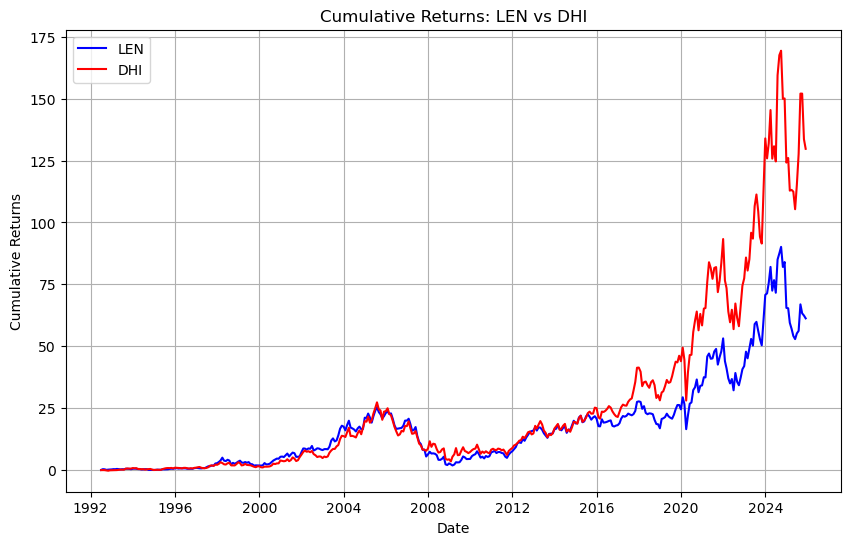

In [71]:
# calculate cumulative returns for LEN_ret and DHI_ret
monthly['LEN_cumret'] = (1 + monthly['LEN_ret']).cumprod() - 1
monthly['DHI_cumret'] = (1 + monthly['DHI_ret']).cumprod() - 1

# plot LEN_ret vs DHI_ret to compare their performance
plt.figure(figsize=(10, 6))
plt.plot(monthly.index, monthly['LEN_cumret'], label='LEN', color='blue')
plt.plot(monthly.index, monthly['DHI_cumret'], label='DHI', color='red')
plt.title('Cumulative Returns: LEN vs DHI')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid()
plt.show()

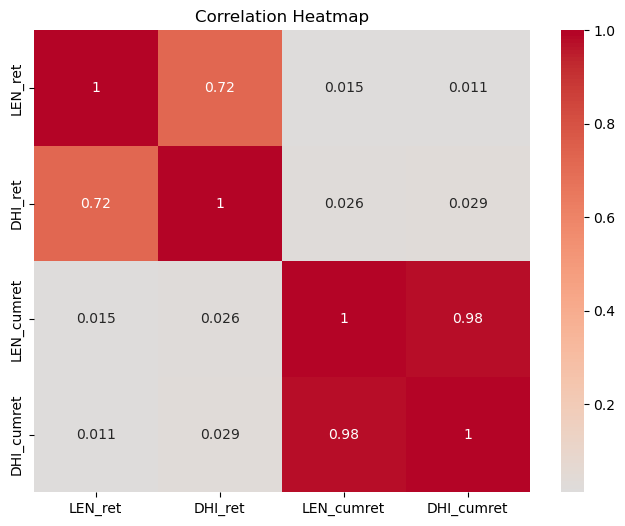

In [72]:
# plot correlation heatmap of LEN_ret, DHI_ret, LEN_cumret, DHI_cumret
plt.figure(figsize=(8, 6))
sns.heatmap(monthly[['LEN_ret', 'DHI_ret', 'LEN_cumret', 'DHI_cumret']].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

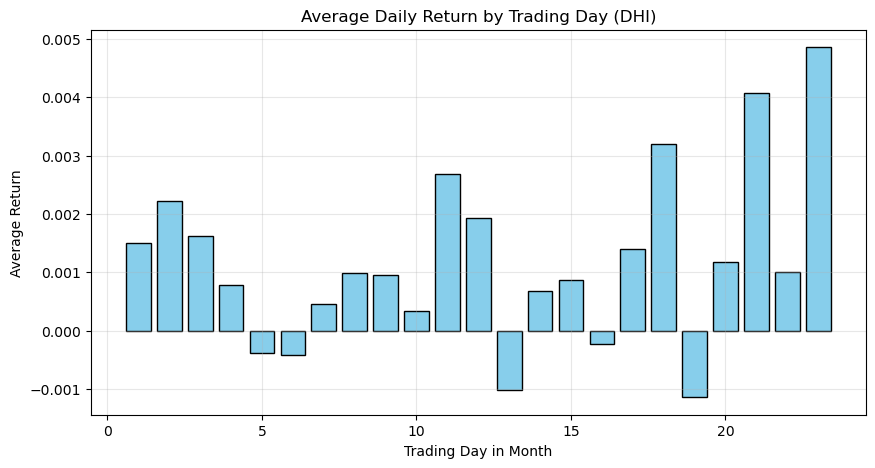

,td,ret
18,19,-0.001144
19,20,0.001173
20,21,0.004073
21,22,0.001010
22,23,0.004859


In [73]:
# Average daily returns of DHI and LEN
# Keep only rows where the ticker is 'DHI' 
DHI = data[data['Ticker'] == 'DHI'].copy()

# Add 'ym' column as the end of the month for each date 
DHI['ym'] = DHI['Date'] + pd.offsets.MonthEnd(0)

# Calculate daily return based on the Close price 
DHI['ret'] = DHI['Close'].pct_change()

DHI_filtered = DHI.copy()

# For each month, number the days starting from 1 
DHI_filtered['td'] = DHI_filtered.groupby('ym').cumcount() + 1

# Group by the trading day number and take the mean of returns 
avg_daily_returns = DHI_filtered.groupby('td')['ret'].mean().reset_index()

# Plot average daily returns using matplotlib 
plt.figure(figsize=(10, 5))
plt.bar(avg_daily_returns['td'], avg_daily_returns['ret'], color='skyblue', edgecolor='black')

# Add labels and title 
plt.title("Average Daily Return by Trading Day (DHI)")
plt.xlabel("Trading Day in Month")
plt.ylabel("Average Return")
plt.grid(alpha=0.3)

plt.show()

# Show the last few rows of the data for reference 
avg_daily_returns.tail()

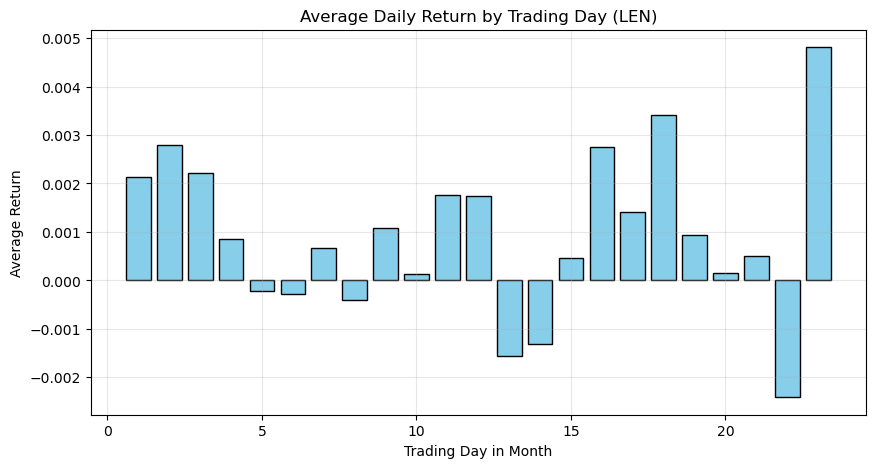

,td,ret
18,19,0.000946
19,20,0.000162
20,21,0.000500
21,22,-0.002410
22,23,0.004810


In [74]:
# Keep only rows where the ticker is 'LEN'
LEN = data[data['Ticker'] == 'LEN'].copy()

# Add 'ym' column as the end of the month for each date
LEN['ym'] = LEN['Date'] + pd.offsets.MonthEnd(0)

# Calculate daily return based on the Close price
LEN['ret'] = LEN['Close'].pct_change()

# # Keep only data after ...
# LEN_filtered = LEN[LEN['Date'] >= pd.Timestamp(2023, 12, 1, tz='UTC')].copy()

LEN_filtered = LEN.copy()

# For each month, number the days starting from 1
LEN_filtered['td'] = LEN_filtered.groupby('ym').cumcount() + 1

# Group by the trading day number and take the mean of returns
avg_daily_returns_LEN = LEN_filtered.groupby('td')['ret'].mean().reset_index()

# Plot average daily returns using matplotlib
plt.figure(figsize=(10, 5))
plt.bar(avg_daily_returns_LEN['td'], avg_daily_returns_LEN['ret'], color='skyblue', edgecolor='black')

# Add labels and title
plt.title("Average Daily Return by Trading Day (LEN)")
plt.xlabel("Trading Day in Month")
plt.ylabel("Average Return")
plt.grid(alpha=0.3)

plt.show()

# Show the last few rows of the data for reference
avg_daily_returns_LEN.tail()

In [75]:
# drop ret	td	som_flag	eom_flag	nsm_flag	ret_som	ret_eom	ret_nsm from data_
data_ = data_.drop(columns=['ret', 'td', 'som_flag', 'eom_flag', 'nsm_flag', 'ret_som', 'ret_eom', 'ret_nsm'])

# pivot data_.Ticker
pivoted_data_ = data_.pivot(index='Date', columns='Ticker', values='Close')

In [76]:
# split DatetimeIndex index into Date and Time columns
pivoted_data_ = pivoted_data_.reset_index()

# Store the original datetime before converting
original_datetime = pivoted_data_['Date']

# Extract date and time from the original datetime column
pivoted_data_['Date'] = original_datetime.dt.date
# pivoted_data_['Time'] = original_datetime.dt.time

# add pct_change columns for each Ticker
pivoted_data_['LEN_pct_change'] = pivoted_data_['LEN'].pct_change()
pivoted_data_['DHI_pct_change'] = pivoted_data_['DHI'].pct_change()

# fill na values with 0
pivoted_data_['LEN_pct_change'] = pivoted_data_['LEN_pct_change'].fillna(0)
pivoted_data_['DHI_pct_change'] = pivoted_data_['DHI_pct_change'].fillna(0)

pivoted_data_.head()

Ticker,Date,DHI,LEN,LEN_pct_change,DHI_pct_change
0,1992-06-05,1.107370,1.952636,0.000000,0.000000
1,1992-06-08,1.107370,1.973860,0.010869,0.000000
2,1992-06-09,1.057036,1.942023,-0.016129,-0.045454
3,1992-06-10,1.057036,1.835903,-0.054644,0.000000
4,1992-06-11,1.006700,1.825290,-0.005780,-0.047620


In [77]:
# # Group by the hour and take the mean of returns 
# avg_daily_returns = pivoted_data_.groupby('Time')[['LEN_pct_change', 'DHI_pct_change']].mean().reset_index()

# avg_daily_returns.head(10)

In [78]:
# # plot avg_daily_returns by Time, using matplotlib
# plt.figure(figsize=(12, 6))

# # Convert time to string for plotting
# time_strings = avg_daily_returns['Time'].astype(str)

# # plt.bar(time_strings, avg_daily_returns['LEN_pct_change'], label='LEN')
# plt.bar(time_strings, avg_daily_returns['DHI_pct_change'], label='DHI')
# plt.xlabel('Time')
# plt.ylabel('Average Hourly Returns')
# plt.title('Average Hourly Returns by Time')
# plt.legend()

# # Rotate x-axis labels for better readability
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

In [79]:
# # plot avg_daily_returns by Time, using matplotlib
# plt.figure(figsize=(12, 6))

# # Convert time to string for plotting
# time_strings = avg_daily_returns['Time'].astype(str)

# plt.bar(time_strings, avg_daily_returns['LEN_pct_change'], label='LEN')
# # plt.bar(time_strings, avg_daily_returns['DHI_pct_change'], label='DHI')
# plt.xlabel('Time')
# plt.ylabel('Average Hourly Returns')
# plt.title('Average Hourly Returns by Time')
# plt.legend()

# # Rotate x-axis labels for better readability
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

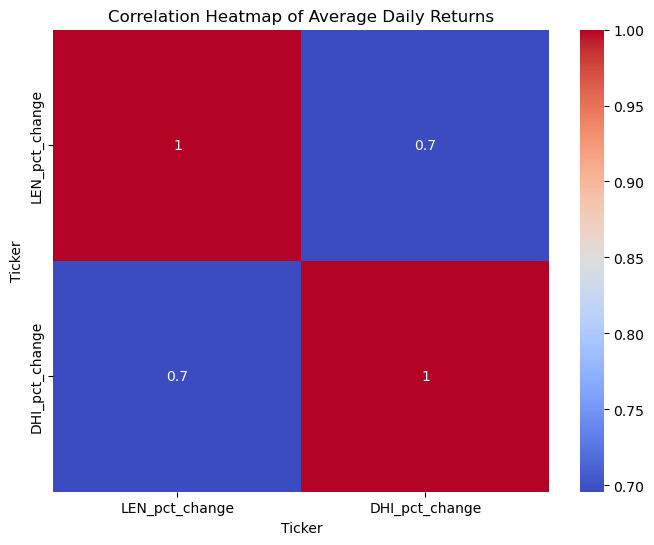

In [81]:
# correlation heatmap of avg_daily_returns
plt.figure(figsize=(8, 6))
sns.heatmap(pivoted_data_[['LEN_pct_change', 'DHI_pct_change']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Average Daily Returns')
plt.show()